In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv('Social_Network_Ads.csv')
df 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


# Remove User ID from DF

In [16]:
df.drop(['User ID'], axis = 1, inplace = True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# Encode the Gender(Binary Category variable

In [17]:
df['Gender'] = df['Gender'].map({'Male':0 , 'Female': 1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# Splitting the dataset into the Training set and Test set

In [21]:
X = df[['Gender','Age', 'EstimatedSalary']].values
y = df['Purchased'].values
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.25,random_state=1)

In [24]:
X_Test.shape

(100, 3)

In [25]:
y_Test.shape

(100,)

# Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_Train = ss.fit_transform(X_Train)
X_Test = ss.transform(X_Test)

# Fit the SVM Model

In [28]:
from sklearn.svm import SVC
model=SVC(kernel = 'linear')
model.fit(X_Train,y_Train)

SVC(kernel='linear')

# Predicting the Test set results

In [29]:
y_predict=model.predict(X_Test)
y_predict

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

# Cofusion matrix

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_roc_curve
print(confusion_matrix(y_Test,y_predict))
print(accuracy_score(y_Test,y_predict))

[[52  6]
 [12 30]]
0.82


# Visualising the Training set results

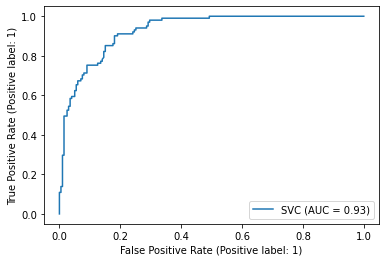

In [31]:
plot_roc_curve(model, X_Train, y_Train)

# Visualising the Test set results

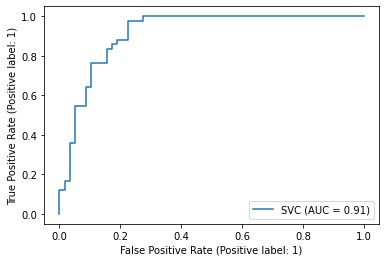

In [32]:
plot_roc_curve(model, X_Test, y_Test)